In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

图像的基础操作

1 获取并修改像素值

In [2]:
img=cv2.imread('sample.jpg')
px=img[100,100]
print(px)
blue=img[100,100,0]
print(blue)
img[100,100]=[255,255,255]
print(img[100,100])

[157 166 200]
157
[255 255 255]


In [3]:
img=cv2.imread('sample.jpg')
print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))

59
100


2 获取图像属性

In [4]:
img=cv2.imread('sample.jpg')
print(img.shape)
print(img.size, img.dtype)

(342, 548, 3)
562248 uint8


3 图像 ROI

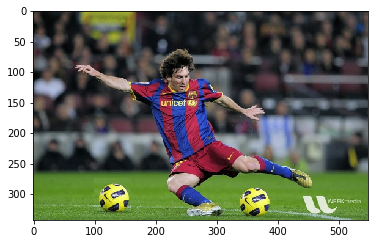

In [5]:
img=cv2.imread('sample.jpg')
ball=img[280:340,330:390]
img[273:333,100:160]=ball
plt.imshow(img[:,:,::-1])
plt.show()

4 拆分及合并图像通道

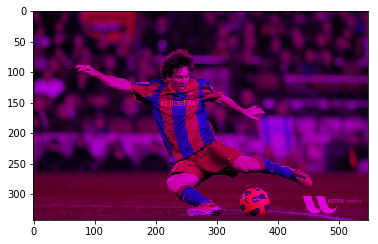

In [6]:
img=cv2.imread('sample.jpg')
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]
img[:,:,1] = 0
img=cv2.merge([b,g,r])
#or
#cv2.split() 是一个比较耗时的操作。只有真正需要时才用它，能用Numpy 索引就尽量用。
#b,g,r=cv2.split(img)
plt.imshow(img[:,:,::-1])
plt.show()

5 为图像扩边（填充）

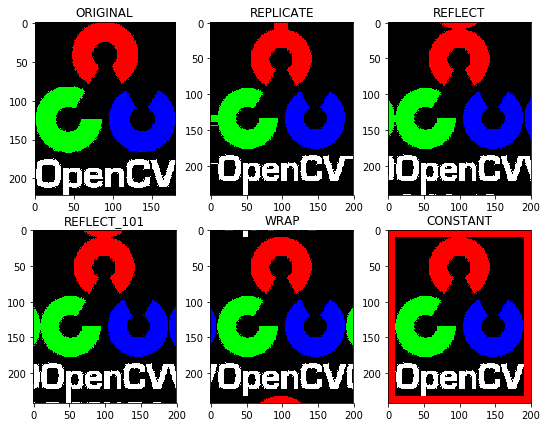

In [7]:
RED=[0,0,255]
img=cv2.imread('logo.png')
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=RED)
fig = plt.figure(figsize=(9,7))
plt.subplot(231),plt.imshow(img[:,:,::-1],'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate[:,:,::-1],'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect[:,:,::-1],'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101[:,:,::-1],'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap[:,:,::-1],'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant[:,:,::-1],'gray'),plt.title('CONSTANT')
plt.show()

图像上的算术运算

1 图像加法

In [8]:
x = np.uint8([250])
y = np.uint8([10])
print (cv2.add(x,y)) # 250+10 = 260 => 255
print (x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


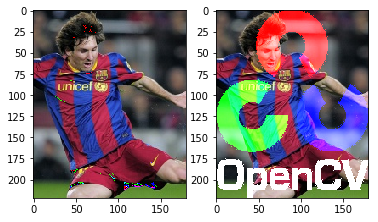

In [9]:
img_1 = cv2.imread('sample.jpg')[60:282, 180:360, :]
img_2 = cv2.imread('logo.png')

image_add_1 = img_1 + img_2
image_add_2 = cv2.add(img_1, img_2)

plt.subplot(121), plt.imshow(image_add_1[:,:,::-1])
plt.subplot(122), plt.imshow(image_add_2[:,:,::-1])
plt.show()

2 图像混合

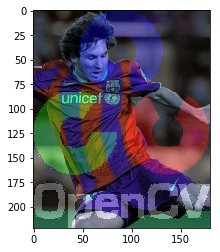

In [10]:
img_1 = cv2.imread('sample.jpg')[60:282, 180:360, :]
img_2 = cv2.imread('logo.png')
dst = cv2.addWeighted(img_1,0.7,img_2,0.3,0)

plt.imshow(dst)
plt.show()

3 按位运算

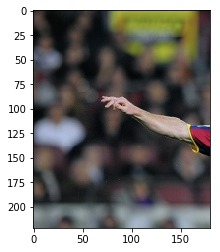

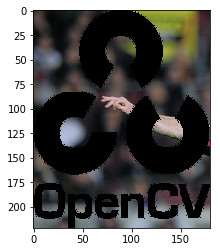

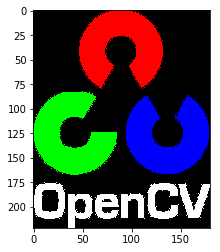

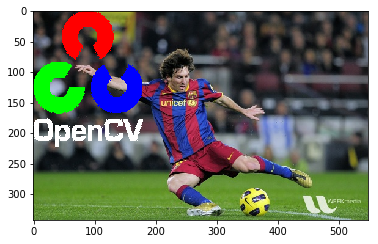

In [11]:
# Load two images
img1 = cv2.imread('sample.jpg')
img2 = cv2.imread('logo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

plt.imshow(roi[:,:,::-1])
plt.show()

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

plt.imshow(img1_bg[:,:,::-1])
plt.show()

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

plt.imshow(img2_fg[:,:,::-1])
plt.show()

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1[:,:,::-1])
plt.show()